# C3M3 Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Apply nonparametric regression to actual data.
2. Visualize the differences between parametrics and nonparametric regressions.
3. Cemment our understanding of Kernels, Bandwidths, and Splines.
4. Understand the different kinds of nonparametric regression.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Load Required Libraries
library(testthat)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()



# Problem 1: Comparing Parametric and Nonparametric Regression

The exa dataset is a simulated dataset following the function $f(x)=\sin^3(2\pi x^3)$. The data is loaded and plotted below. We will use this dataset to get you practicing some non-parametric regression techniques.

Data Source: Haerdle, W. (1991). Smoothing Techniques with Implementation in S. New York:Springer.

,X,x,y,m
,<int>,<dbl>,<dbl>,<dbl>
1,1,0.0048,-0.0339,0
2,2,0.0086,0.1654,0
3,3,0.0117,0.0245,0
4,4,0.0170,0.1784,0
5,5,0.0261,-0.3466,0
6,6,0.0299,-0.7550,0


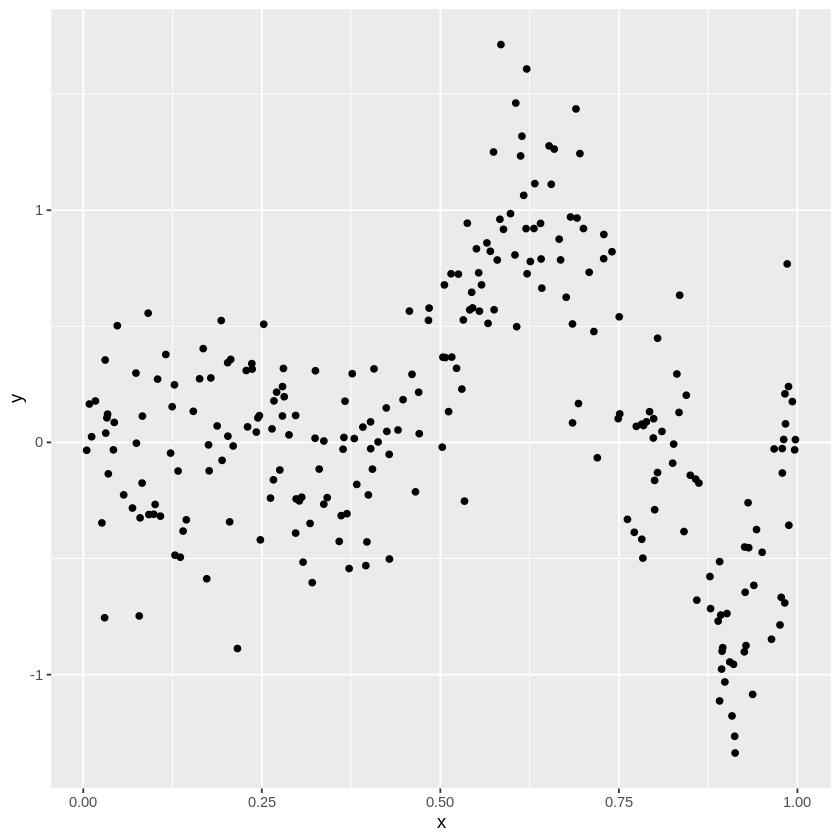

In [2]:
# Load in the Data
exa = read.csv("exa.csv")
head(exa)
# Plot the Data
g = ggplot(exa, aes(x=x, y=y)) +
        geom_point()
g

### 1. (a) Linear Regression First

From the graph, we can assume that a linear model isn't going to plot to this function very well. But assumptions can be wrong, so let's see how well they do for our model.

Begin by fitting a linear model with `y` as the response and `x` as the predictor. Save this model as `exa.lmod.1` and it's $R^2$ as `exa.lmod.1.r2`. Because there is only one predictor, we can visually plot our model to see how well it fits the data. Plot your model ontop of the original plot.

Now, lets add some parametric terms. Following the techniques displayed in the videos, add parametric terms of `x` of higher and higher degrees until you reach one that is no longer significant. Use the previous model with a significant $d^{th}$ predictor coefficient. Save this model as `exa.lmod.d` and its $R^2$ value as `exa.lmod.d.r2`. Then plot this model ontop of the origional plot as well.

In [10]:
exa.lmod.1 = NA
exa.lmod.1.r2 = NA

exa.lmod.d = NA
exa.lmod.d.r2 = NA

# your code here
exa.lmod.1 = lm(y~x,exa)
exa.lmod.1.r2 = summary(exa.lmod.1)$r.squared
summary(exa.lmod.1)

exa.lmod.d = lm(y~ x + I(x^2) + I(x^3) + + I(x^4) + I(x^5) + I(x^6) + I(x^7), exa)
exa.lmod.d.r2 = summary(exa.lmod.d)$r.squared
summary(exa.lmod.d)

#g + 
#    geom_smooth(method="lm", formula=eval(exa.lmod.1$call[[2]]), col="#CFB87C") +
#    geom_smooth(method="lm", formula=eval(exa.lmod.d$call[[2]]), col="#565A5C")


Call:
lm(formula = y ~ x, data = exa)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.37130 -0.38225 -0.03859  0.35393  1.63247 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.16450    0.07111   2.313   0.0215 *
x           -0.14307    0.11994  -1.193   0.2340  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5655 on 254 degrees of freedom
Multiple R-squared:  0.005571,	Adjusted R-squared:  0.001656 
F-statistic: 1.423 on 1 and 254 DF,  p-value: 0.234



Call:
lm(formula = y ~ x + I(x^2) + I(x^3) + +I(x^4) + I(x^5) + I(x^6) + 
    I(x^7), data = exa)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.92786 -0.18876  0.00852  0.20707  0.99214 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.2731     0.1793   1.523 0.129103    
x             -17.0415     6.4380  -2.647 0.008640 ** 
I(x^2)        241.0677    73.4100   3.284 0.001172 ** 
I(x^3)      -1382.5192   374.0870  -3.696 0.000270 ***
I(x^4)       3791.7035   978.7079   3.874 0.000137 ***
I(x^5)      -5215.4309  1367.3305  -3.814 0.000172 ***
I(x^6)       3457.9499   969.4670   3.567 0.000433 ***
I(x^7)       -875.7631   274.0048  -3.196 0.001573 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3251 on 248 degrees of freedom
Multiple R-squared:  0.6791,	Adjusted R-squared:   0.67 
F-statistic: 74.97 on 7 and 248 DF,  p-value: < 2.2e-16


In [11]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [12]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (b) Visualize some Smooth Functions

Even if `exa.lmod.d` looks pretty good, we know that it's not the original function. Let's try some smoothing functions to see how those preform.

Use the ksmooth() function to plot some kernel estimators of the unknown function $Y=f(x)$. Explore different possibilities for kernel functions, including `normal` and `uniform` kernels. For each kernel, try different bandwidths including $0.01$, $0.1$ and $1$. Plot your models and determine which combination provides the best results. Save your selected kernel as `best.kernel` and the best bandwidth as `best.bandwidth`.

integer(0)

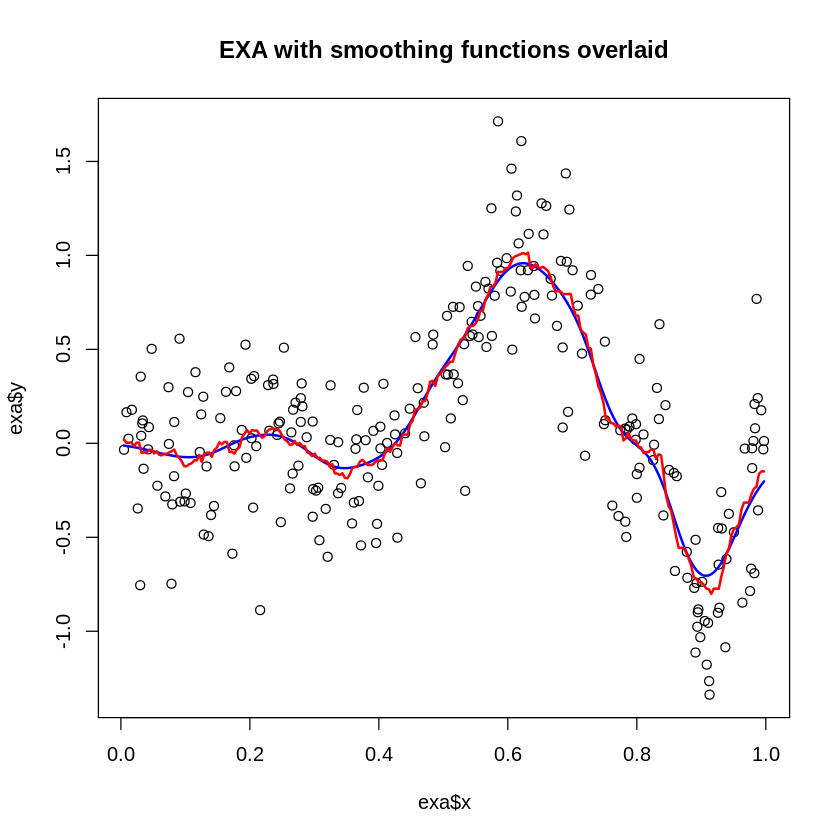

In [28]:
best.kernel = NA
best.bandwidth = NA

# your code here
smoo1 = ksmooth(exa$x,exa$y,"normal",0.1)
smoo2 = ksmooth(exa$x,exa$y,"box",0.1)

best.kernel = "normal"
best.bandwidth = 0.1 #no points


plot(x=exa$x, y=exa$y, main="EXA with smoothing functions overlaid") +
lines(smoo1, col="blue", lwd=2) +
lines(smoo2, col = "red", lwd=2)

#receieved no points for this question

In [29]:
# Test Cell
if (!test_that("Checking Answer types", {expect_is(best.kernel, "character")
                                         expect_is(best.bandwidth, "numeric")})){
    print("Answers are incorrect types. Make sure best.bandwidth is numeric and best.kernel is a string.")
}
# This cell has hidden test cases that will run after submission.

In reality, manually finding this kernel value ourselves, especially if there are multiple predictors, can be challenging. There are some automated ways to do this, but none are perfect. 

### 1. (c) Smoothing Splines

Use the `smooth.spline()` function to fit a non-parametric model to your data, with `y` as the response and `x` as the predictor. Save your model as `exa.smooth`. Plot this model onto the origional scatterplot.

           Length Class             Mode   
x          255    -none-            numeric
y          255    -none-            numeric
w          255    -none-            numeric
yin        255    -none-            numeric
tol          1    -none-            numeric
data         3    -none-            list   
no.weights   1    -none-            logical
lev        255    -none-            numeric
cv.crit      1    -none-            numeric
pen.crit     1    -none-            numeric
crit         1    -none-            numeric
df           1    -none-            numeric
spar         1    -none-            numeric
ratio        1    -none-            numeric
lambda       1    -none-            numeric
iparms       5    -none-            numeric
auxM         0    -none-            NULL   
fit          5    smooth.spline.fit list   
call         4    -none-            call   

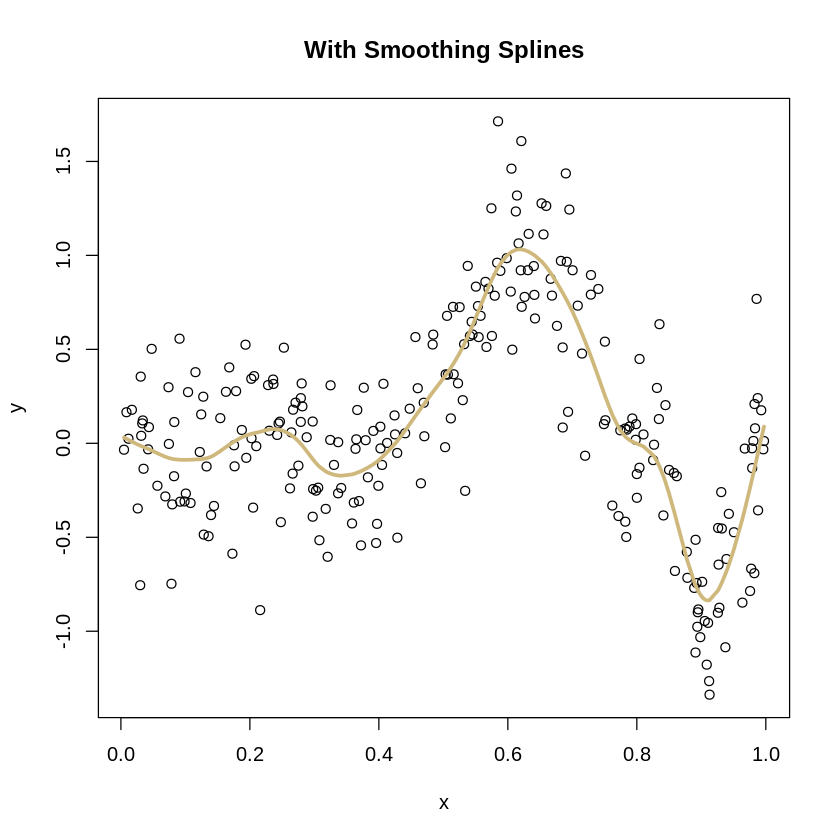

In [48]:
exa.smooth = NA

# your code here
exa.smooth = smooth.spline(exa$x, exa$y, spar = 0.7)



plot(y ~ x, data = exa, main = "With Smoothing Splines")
lines(exa.smooth, col = "#CFB87C", lwd=3)
summary(exa.smooth)
# no points for this question

In [46]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 1. (d) Goodness of Fit

How do we determine how well our model fits the data? We don't have an analytical method, so we need to use evaluation metrics.

Calculate the MSE for your three models. Store the values in `MSE.1`, `MSE.d` and `MSE.smooth` respectively. Which model performed the best?

In [51]:
# your code here
MSE.1  = mean(exa.lmod.1$residuals^2); MSE.1

MSE.d = mean(exa.lmod.d$residuals^2); MSE.d

p = predict(exa.smooth)#, exa$x)
MSE.smooth = mean((exa$y - p$y)^2); MSE.smooth #wrong somehow

print("the smooth spline performed the best")


[1] 0.3172591

[1] 0.1023873

Warning message in exa$y - p$y:
“longer object length is not a multiple of shorter object length”


[1] 0.09105523

[1] "the smooth spline performed the best"


In [52]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [53]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [54]:
# Test Cell
# This cell has hidden test cases that will run after submission.

# Problem 2 - General Nonparametric Questions

For each of the following questions, save your answer in the corresponding variable. Answer each as a boolean TRUE/FALSE value.

1. Generally, the choice of Kernel is more important than the choice of bandwidth.
2. A Kernel is defined to be symmetric for all values of $x$ and $\int K(x)dx = 1$.
3. Smoothing Splines are a balance between fitting the training data as accurately as possible and penalizing models that have a greater amount of curvature.
4. For Loess estimation, if $p=0$, then the Loesse estimator is equivalent to Kernel estimation.
5. The `smooth.spline()` function is guaranteed to give you the best bandwidth value.

In [60]:
prob.2.1 = FALSE

prob.2.2 = TRUE

prob.2.3 = TRUE

prob.2.4 = TRUE

prob.2.5= FALSE

# your code here
# all good, i think

In [61]:
# Test Cell
if (!test_that("Checking answer types", expect_is(c(prob.2.1, prob.2.2, prob.2.3, prob.2.4, prob.2.5), 
                                                  c("logical", "logical", "logical", "logical", "logical")))){
    print("Make sure your answers are all booleans!")
}
# This cell has hidden test cases that will run after submission.

In [62]:
# This cell has hidden test cases that will run after submission.

In [63]:
# This cell has hidden test cases that will run after submission.

In [64]:
# This cell has hidden test cases that will run after submission.

In [65]:
# This cell has hidden test cases that will run after submission.